In [3]:
import halem.Mesh_maker as Mesh_maker
import halem.Functions as Functions
import halem.Calc_path as Calc_path
from scipy.spatial import Delaunay

import pytest
import numpy as np
import geopy.distance


def coord_a():
    return (0, 0)


def coord_b():
    return (0, 1)


def vship():
    return 5


def v(mag):
    v = np.array([[0, 0, 1, -1]])
    v = mag * np.concatenate((v, v), axis=0)
    return v


def u(mag):
    u = np.array([[1, -1, 0, 0]])
    u = mag * np.concatenate((u, u), axis=0)
    return u


class flow:
    def __init__(self, mag, name="maaktnietuit"):
        self.t = np.arange(0, 100) + 1558077464
        self.nodes = np.array([(0, 0), (0, 1), (1, 1), (0, 3)])

        self.tria = Delaunay(self.nodes)
        self.WD = np.ones((len(self.t), len(self.nodes))) * 1000
        self.u = np.ones((len(self.t), len(self.nodes))) * mag
        self.v = np.ones((len(self.t), len(self.nodes))) * 0
        self.WWL = 1
        self.LWL = 1
        self.ukc = 1


def test_haversine():
    dist = Functions.haversine(coord_a(), coord_a())
    dist1 = Functions.haversine(coord_a(), coord_b())
    dist2 = geopy.distance.geodesic(coord_a(), coord_b()).m

    assert dist == 0
    assert abs(dist1 - dist2) < 0.01 * dist1


def test_costfunction_time():
    mag = 3
    WD_min = 1
    edge = (0, 1)
    nodes = [coord_a(), coord_b(), (1, 0), (1, 1)]
    mask = np.full((u(mag).shape), False)
    WVPI = 1
    L = Functions.costfunction_timeseries(
        edge, vship(), WD_min, flow(3), WVPI, 1, flow(3).tria
    )

    VSHIP = Functions.Squat(
        flow(3).WD[0], WD_min, vship(), flow(3).LWL, flow(3).WWL, flow(3).ukc, WVPI
    )

    VV = np.array([VSHIP[0] + mag, VSHIP[0] + mag, VSHIP[0] + mag, VSHIP[0] + mag])
    dist1 = Functions.haversine(coord_a(), coord_b())
    dist = dist1 / VV

    np.testing.assert_array_equal(L, dist)


def test_costfunction_space():
    mag = 3
    WD_min = 1
    edge = (0, 1)
    nodes = [coord_a(), coord_b(), (1, 0), (1, 1)]
    mask = np.full((u(mag).shape), False)
    WVPI = 1
    L = Functions.costfunction_spaceseries(
        edge, vship(), WD_min, flow(3), WVPI, 1, flow(3).tria
    )
    dist1 = Functions.haversine(coord_a(), coord_b())
    dist = dist1

    np.testing.assert_array_equal(L, dist)


def test_find_neighbor():
    nodes = [
        (3, 3),
        (2, 2),
        (2, 4),
        (4, 2),
        (4, 4),
        (1, 1),
        (1, 3),
        (1, 5),
        (3, 1),
        (3, 5),
        (5, 1),
        (5, 3),
        (5, 5),
        (0, 0),
        (0, 2),
        (0, 4),
        (0, 6),
        (2, 0),
        (4, 0),
        (2, 6),
        (4, 6),
        (6, 0),
        (6, 2),
        (6, 4),
        (6, 6),
    ]

    tria = Delaunay(nodes)
    nb = Functions.find_neighbors(0, tria)

    assert len(nb) == 4
    for i in range(1, 5):
        assert i in nb


def test_find_neighbor2():
    nodes = [
        (3, 3),
        (2, 2),
        (2, 4),
        (4, 2),
        (4, 4),
        (1, 1),
        (0.9, 3),
        (1, 5),
        (3, 1),
        (3, 5.1),
        (5, 1),
        (5, 3),
        (5, 5),
        (0, 0),
        (-0.1, 2),
        (-0.1, 4),
        (0, 6),
        (2, 0),
        (4, 0),
        (2, 6.1),
        (4, 6.1),
        (6, 0),
        (6, 2),
        (6, 4.1),
        (6, 6),
    ]
    tria = Delaunay(nodes)

    nb = Functions.find_neighbors2(0, tria, 0)
    assert len(nb) == 0

    nb = Functions.find_neighbors2(0, tria, 1)
    assert len(nb) == 4
    for i in range(1, 5):
        assert i in nb

    nb = Functions.find_neighbors2(0, tria, 2)
    assert len(nb) == 12
    for i in range(1, 13):
        assert i in nb

    nb = Functions.find_neighbors2(0, tria, 3)
    assert len(nb) == 24
    for i in range(1, 25):
        assert i in nb




In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

test_costfunction_space()
test_costfunction_time()
test_haversine()
print('passed all tests')

passed all tests


In [44]:
def test_inbetweenpoints():
    x = range(0,5)
    y = range(0,5)
    x,y = np.meshgrid(x,y)

    nodes = np.zeros((x.size,2))
    nodes[:,1] = x.reshape(x.size)
    nodes[:,0] = y.reshape(x.size)
    tria = Delaunay(nodes)
    IB = Functions.inbetweenpoints(5,18,3,tria)

    np.testing.assert_array_equal(IB, np.array([ 5, 18,  7, 11, 12, 16, 17]))

SyntaxError: invalid syntax (<ipython-input-44-e43f086486f6>, line 1)

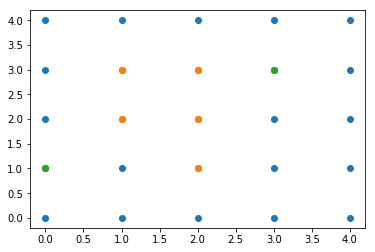

In [42]:
plt.plot(nodes[:,1], nodes[:,0], 'o')
plt.plot(nodes[:,1][IB], nodes[:,0][IB], 'o')
plt.plot(nodes[:,1][[5,18]], nodes[:,0][[5,18]], 'o')


In [41]:
IB = Functions.inbetweenpoints(5,18,3,tria)
IB

array([ 5, 18,  7, 11, 12, 16, 17])

In [27]:
Functions.find_neighbors2(8,tria,3)

array([ 1.,  0.,  6., 11., 10.,  7.,  2., 15., 16., 12., 17.,  3.,  8.,
       13., 21., 20., 22., 23., 18.])

In [33]:
IB

array([ 5, 18,  7, 11, 12, 16, 17])

In [46]:
import halem.Base_functions as halem
import halem.Mesh_maker as Mesh_maker
import halem.Functions as Functions
import halem.Calc_path as Calc_path

import pytest
import numpy as np
from scipy.spatial import Delaunay
from IPython.display import clear_output
import os
import pickle


class flow_class:
    def __init__(self, name="maaktnietuit"):
        self.t = np.arange(0, 100) + 1558077464
        self.nodes = np.array([(0, 0), (0, 0.001), (0.001, 0.001), (0, 0.003)])

        self.tria = Delaunay(self.nodes)

        self.WD = np.ones((len(self.t), len(self.nodes))) * 100
        self.u = np.ones((len(self.t), len(self.nodes))) * 0
        self.v = np.ones((len(self.t), len(self.nodes))) * 0
        self.u[:, 2] = 10


class flow_class2:
    def __init__(self, name="maaktnietuit"):
        self.t = np.arange(0, 100) + 1558077464
        self.nodes = np.array([(0, 0), (0, 0.001), (0.001, 0.001)])
        self.tria = Delaunay(self.nodes)
        self.nodes = np.array([(0, 0), (0, 0.001), (0.001, 0.001), (1,1)])

        self.WD = np.ones((len(self.t), len(self.nodes))) * 100
        self.u = np.ones((len(self.t), len(self.nodes))) * 0
        self.v = np.ones((len(self.t), len(self.nodes))) * 0
        self.u[:, 2] = 10


name_textfile_flow = "maaktnietuit"
Load_flow = flow_class
blend = 0
nl = (1, 1)
dx_min = 0.0000001
vship = np.array([[3, 4], [4, 5]])
WD_min = np.array([1, 1])
WVPI = np.array([5000, 7000])
ukc = 0


nodes_on_land = Functions.nodes_on_land_None
number_of_neighbor_layers = 1

Roadmap = Mesh_maker.Graph_flow_model(
    name_textfile_flow,
    dx_min,
    blend,
    nl,
    number_of_neighbor_layers,
    vship,
    Load_flow,
    WD_min,
    WVPI,
)

Load_flow = flow_class2

Roadmap2 = Mesh_maker.Graph_flow_model(
    name_textfile_flow,
    dx_min,
    blend,
    nl,
    number_of_neighbor_layers,
    vship,
    Load_flow,
    WD_min,
    WVPI,
)

clear_output()
"


4/4
1/4


IndexError: index 4 is out of bounds for axis 0 with size 4

In [100]:
def test_percentageprinter():
    class flow_class:
        def __init__(self):
            x = np.arange(0,1100)
            y = 0 * np.arange(0,1100)
            y[::2] = 5 

            nodes = np.zeros((x.size,2))
            nodes[:,1] = x.reshape(x.size)
            nodes[:,0] = y.reshape(x.size)
            tria = Delaunay(nodes)
            self.t = np.arange(3)
            self.nodes = nodes
            blank = np.zeros((len(self.t), len(nodes)))
            self.tria = tria
            self.u = blank
            self.v = blank
            self.WD = blank

    f = flow_class()
    Q = Mesh_maker.node_reduction(f, (0,0),1,0)

In [126]:
class flow_class:
    def __init__(self):
        x = np.arange(0,3)
        y = 0 * np.arange(0,3)
        y[::2] = 5 

        nodes = np.zeros((len(x),2))
        nodes[:,1] = x
        nodes[:,0] = y
        tria = Delaunay(nodes)
        self.t = np.arange(3)
        self.nodes = nodes
        blank = np.zeros((len(self.t), len(nodes)))
        self.tria = tria
        self.u = blank
        self.v = blank
        self.WD = blank

f = flow_class()
NR = Mesh_maker.node_reduction(f,(0.01,0.001),1,0)
np.testing.assert_array_equal(NR.LS.data, np.ones(3))

In [129]:
len(Functions.find_neighbors(0, f.tria))

2